Import all necessary libraries and modules.

In [2]:
import numpy as np
import seaborn as sb
import matplotlib as mb
import matplotlib.pyplot as plt
import plotly as pl
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import feature_engine as fe
import sys
sys.path.append('../')
from assets.transformers import pipeline, scaling_transformer

Return a copy of the newly cleaned dataset to plot some visualizations.

In [4]:
bc = pd.read_csv("../assets/processed-bank-churners.csv")
bc

,Customer_Status,Age,Gender,Income_Level,Tenure_Months,Inactive_Months_In_Last_12,Credit_Limit,Total_Trans_Amount,Total_Trans_Count,Avg_Utilization_Ratio
0,Existing Customer,41,F,Unknown,30,1,5417.0,1768,56,0.35
1,Attrited Customer,60,M,$40K - $60K,47,1,3735.0,8193,66,0.32
2,Existing Customer,47,M,Less than $40K,34,1,8390.0,8316,92,0.00
3,Existing Customer,44,M,$60K - $80K,37,2,1682.0,3309,67,0.55
4,Existing Customer,47,F,Less than $40K,36,2,2500.0,4265,87,0.47
...,...,...,...,...,...,...,...,...,...,...
191,Existing Customer,31,M,$40K - $60K,22,1,9096.0,2318,54,0.00
192,Existing Customer,50,F,Less than $40K,38,3,2775.0,4608,84,0.53
193,Existing Customer,38,F,Less than $40K,29,3,3590.0,1472,37,0.54
194,Attrited Customer,39,F,$40K - $60K,31,3,3333.0,3348,50,0.56


Create visualizations using Seaborn and Matplotlib (Remember specific styles for visualizations can also be set).

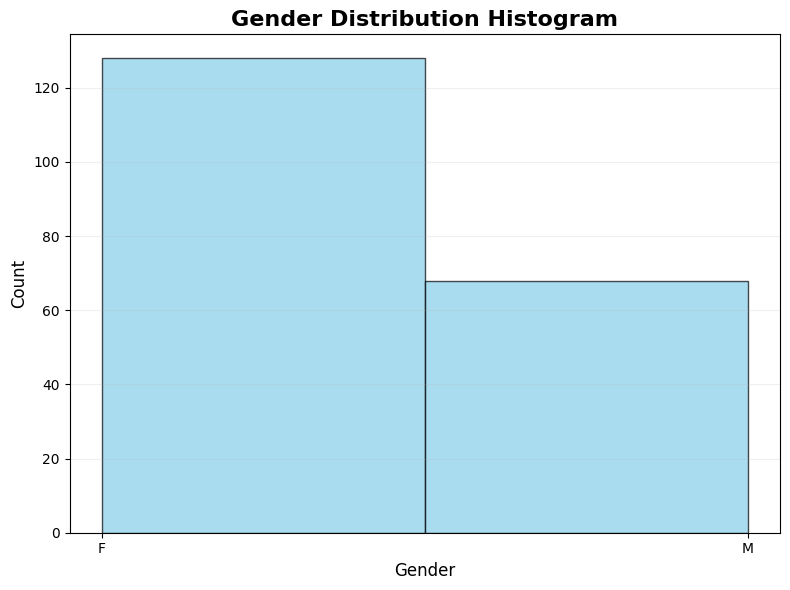

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(bc["Gender"], bins=len(bc["Gender"].unique()), color="skyblue", alpha=0.7, edgecolor="black")
plt.title("Gender Distribution Histogram", fontsize=16, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

The histogram above provides us with a depiction of gender distribution within the dataset. As we can see, there are more females in possession of credit card accounts, and this may be held to several reasons, including, potentially, a greater penchant to purchase certain types of goods utilising lines of credit. There are nearly double the amount of females than there are males.

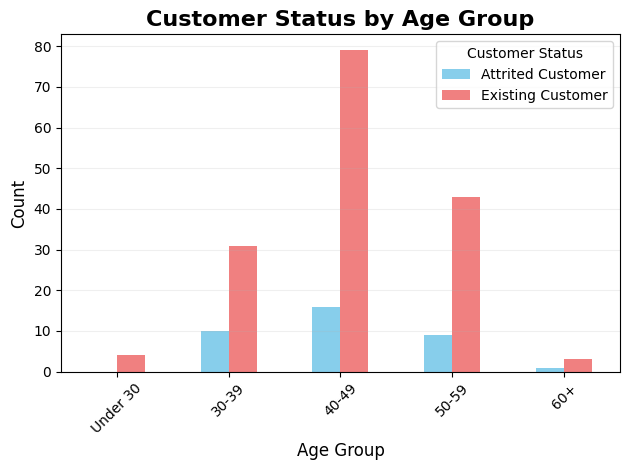

In [53]:
bc["Age_Group"] = pd.cut(bc["Age"], bins=[0, 30, 40, 50, 60, 100], 
                         labels=["Under 30", "30-39", "40-49", "50-59", "60+"])
crosstab = pd.crosstab(bc["Age_Group"], bc["Customer_Status"])
crosstab.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("Customer Status by Age Group", fontsize=16, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Customer Status")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

The comparative bar chart above plots age against attrited customers (customers who do not currently do business with the company anymore) and existing customers. We can see that in each age category, there are less attrited customers. We might also look to note that within the 40-49 age range, there are more customers as well as a greater attrition level overall. Despite this, comparatively, proportionality wise, the 30-39 age range has witnessed greater customer attrition. 

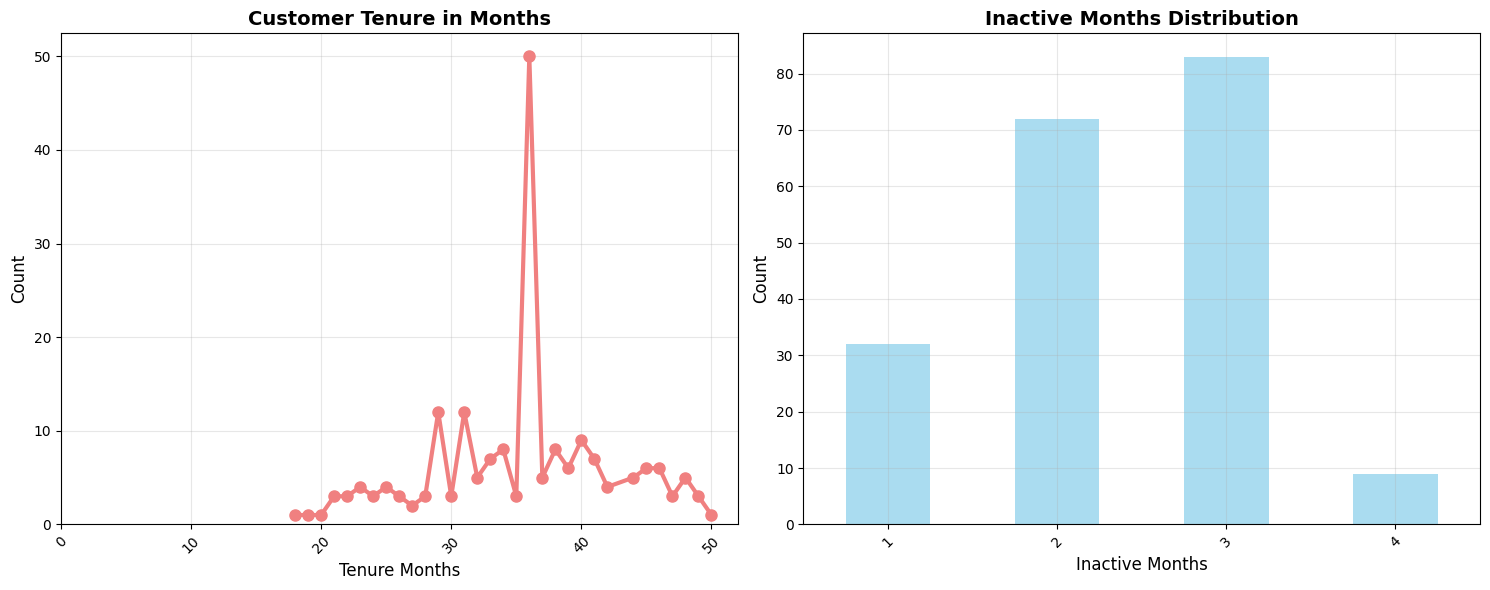

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
tenure_counts = bc["Tenure_Months"].value_counts().sort_index()
ax1.plot(tenure_counts.index, tenure_counts.values, marker='o', linewidth=3, markersize=8, color='lightcoral')
ax1.set_title("Customer Tenure in Months", fontsize=14, fontweight='bold')
ax1.set_xlabel("Tenure Months", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, bc["Tenure_Months"].max() + 2)
ax1.set_ylim(0, None)
bc["Inactive_Months_In_Last_12"].value_counts().sort_index().plot(kind="bar", ax=ax2, color="skyblue", alpha=0.7)
ax2.set_title("Inactive Months Distribution", fontsize=14, fontweight="bold")
ax2.set_xlabel("Inactive Months", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, None)
plt.tight_layout()
plt.show() 

Regardless of the uncanny semblance of the two presented plots, there is little to note whether or not their correlations relate, whilst this is plottable, our current graphs in their separation do not reflect this. Despite this, considering a correlation that may not be overtly visible from the data presented, what one might look to assume is that the longer a customer is retained, the more the opportunity is opened for them to go inactive.

Aside from this, separately, we may note that that generally, within the line diagram, customer tenure within the ranges of 10 to 30 and 40 to 50 months are near evenly distributed. There is one point on the graph that assumes about 50 customers from the dataset have been there for roughly 47 months, which is not the longest time active with the credit card company, but the largest data point by far.

The histogram provides that throughout the dataset, the wealth of customers mainly go inactive for a period of 2 to 3 months, within the range of 1 to 4 months inclusive, amounting for over 70 percent of total inactivity, 3 being the maximum, just over 80, and 2 months just over 70 customers. 1 month of inactivity is fairly low, just over 30, and 4 months is surprisingly low, just under 10, noting that individuals tend to resume activity after a period of 3 months inactivity maximum.